In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-housing-dataset/HousingData.csv


In [2]:
# Data Analysis phase
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#  Exploring Dataset

**Loading Dataset**

About Dataset

Boston housing datasetcontains 506 observations and 14 features

Challenges:

1-Missing value treatment

2-Outlier treatment

3-Understanding which variables drive the price of homes in Boston



In [3]:

dataset=pd.read_csv('/kaggle/input/boston-housing-dataset/HousingData.csv')

In [4]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
## print the top5 records
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
## print the last5 records
dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
# print shape of dataset with rows and columns
dataset.shape


(506, 14)

In [10]:
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

# preprocessing the data 

**1-ckecking missing values**

In [11]:
# Viewing the data statistics
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
dataset.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

([<matplotlib.patches.Wedge at 0x77fc0b47feb0>,
 [Text(-0.9064866616192165, 0.6231227265205854, 'Not_Null'),
  Text(0.9064866324487352, -0.6231227689562884, 'Null')],
 [Text(-0.49444726997411803, 0.33988512355668293, '80.83%'),
  Text(0.49444725406294643, -0.33988514670342995, '19.17%')])

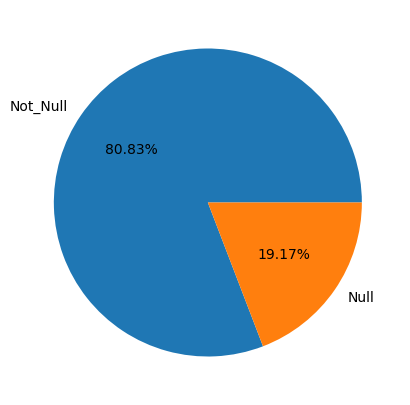

In [14]:
plt.figure(figsize=(5,5))
plt.pie([dataset.shape[0],dataset.isnull().sum().sum()],labels = ['Not_Null','Null'],autopct='%1.2f%%')

In [15]:
def missing_zero_values_table(df):
       # zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([ mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
       # mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
       # mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
       # mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(2)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#       mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(dataset)

Your selected dataframe has 14 columns and 506 Rows.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
CRIM,20,3.95
ZN,20,3.95
INDUS,20,3.95
CHAS,20,3.95
AGE,20,3.95
LSTAT,20,3.95


In [16]:
dataset.nunique()

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64

**1.1 handling the missing values**

In [17]:
dataset = dataset.fillna(dataset.mean())

In [18]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [20]:
z_scores = (dataset - np.mean(dataset)) / np.std(dataset)

# Set a threshold for the Z-Score
threshold = 3

# Identify the outliers
outliers = np.abs(z_scores) > threshold

# Remove the outliers
cleaned_data = dataset[~outliers]

# Print the original and cleaned dataset sizes
print("Original dataset size:", len(dataset))
print("Cleaned dataset size:", len(cleaned_data))

Original dataset size: 506
Cleaned dataset size: 506


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


**2-Feature Selection**

*Finding variables which are useful for prediction*

Coorelation Matrix :

<AxesSubplot: >

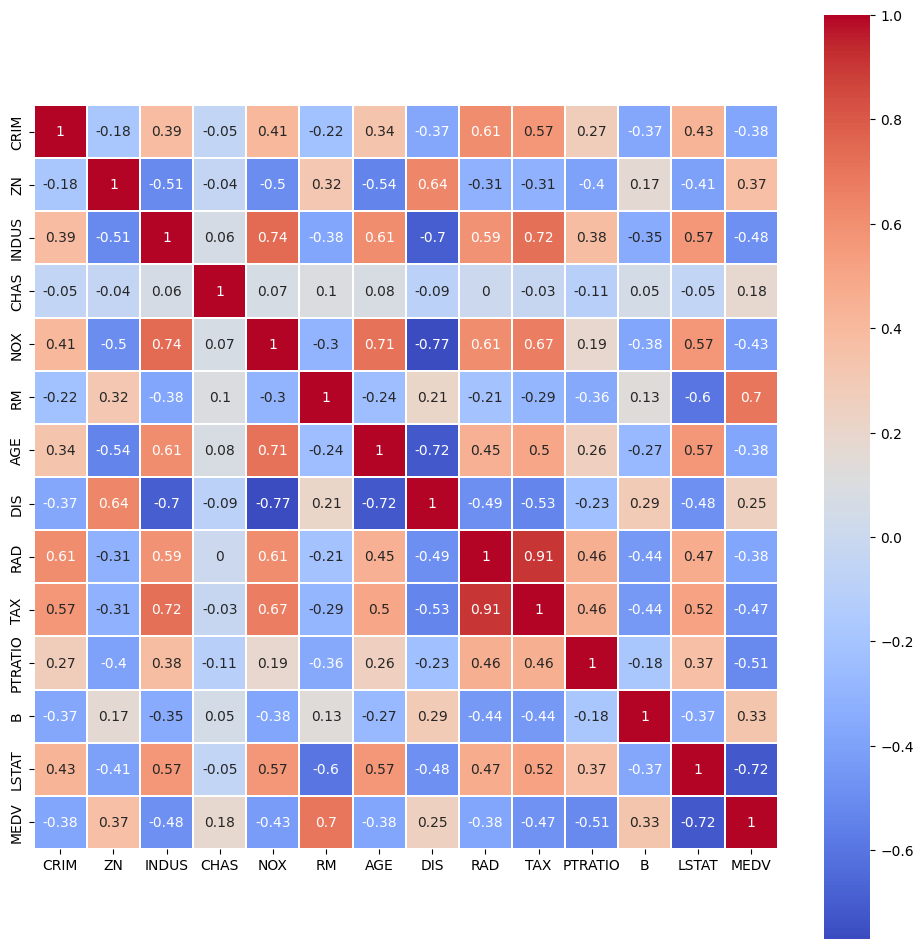

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(data=dataset.corr().round(2),annot=True,cmap='coolwarm',linewidths=0.2,square=True)

As we can see that RM has high positive correlation with Price and LSTAT has negative correlation with MEDV. We can see these correlation through visualisation, 
but also we can see that INDUS ,PTRATIO,TAX have good coorelation with 

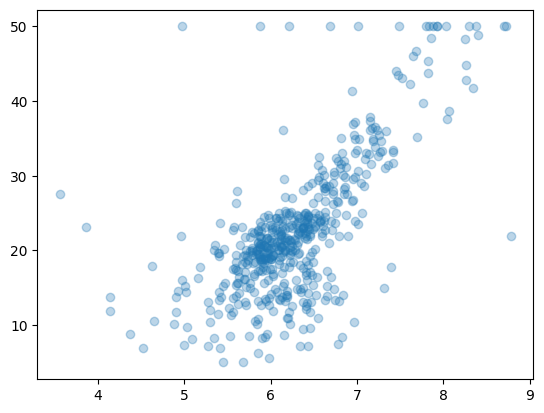

In [22]:
plt.scatter(dataset['RM'],dataset['MEDV'],alpha=0.3)#high positive corelation

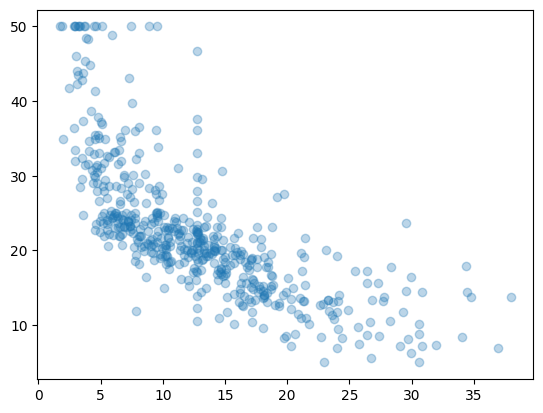

In [23]:
plt.scatter(dataset['LSTAT'],dataset['MEDV'],alpha=0.3)# high negative correlation

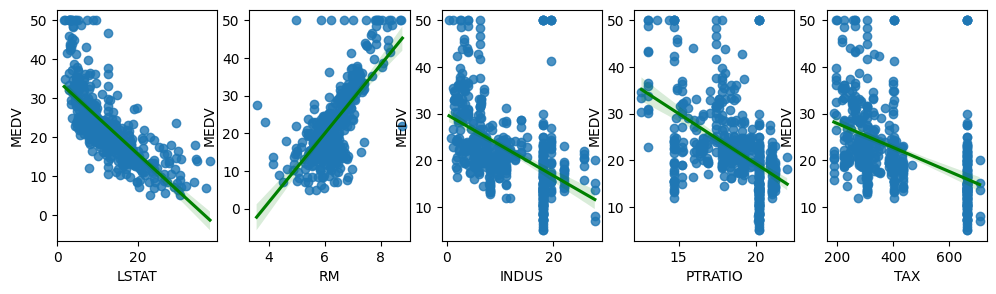

In [24]:
# Visualize the data
# Pairplot for features 'CRIM', 'ZN', 'INDUS', and 'CHAS' vs target variable 'MEDV' with orange linear regression lines
fig, ax = plt.subplots(1,5, figsize=(12, 3))
sns.regplot(x='LSTAT', y='MEDV', data=dataset, ax=ax[0], line_kws={'color': 'green'})
sns.regplot(x='RM', y='MEDV', data=dataset, ax=ax[1], line_kws={'color': 'green'})
sns.regplot(x='INDUS', y='MEDV', data=dataset, ax=ax[2], line_kws={'color': 'green'})
sns.regplot(x='PTRATIO', y='MEDV', data=dataset, ax=ax[3], line_kws={'color': 'green'})
sns.regplot(x='TAX', y='MEDV', data=dataset, ax=ax[4], line_kws={'color': 'green'})
plt.show()

so here the new data after feature selection 

In [25]:
new_dataset = dataset[['INDUS','RM','TAX','PTRATIO','LSTAT','MEDV']]
new_dataset.head()

,INDUS,RM,TAX,PTRATIO,LSTAT,MEDV
0,2.31,6.575,296,15.3,4.980000,24.0
1,7.07,6.421,242,17.8,9.140000,21.6
2,7.07,7.185,242,17.8,4.030000,34.7
3,2.18,6.998,222,18.7,2.940000,33.4
4,2.18,7.147,222,18.7,12.715432,36.2


In [26]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   INDUS    506 non-null    float64
 1   RM       506 non-null    float64
 2   TAX      506 non-null    int64  
 3   PTRATIO  506 non-null    float64
 4   LSTAT    506 non-null    float64
 5   MEDV     506 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 23.8 KB


In [27]:
new_dataset.isnull()

,INDUS,RM,TAX,PTRATIO,LSTAT,MEDV
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
501,False,False,False,False,False,False
502,False,False,False,False,False,False
503,False,False,False,False,False,False
504,False,False,False,False,False,False


In [28]:
X = new_dataset.drop(['MEDV'], axis=1)
X.columns = ['INDUS','RM','TAX', 'PTRATIO','LSTAT']
# Get the target variable
y = new_dataset['MEDV']

In [29]:
# Split the data  into train set and test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Regression Models

**1-Linear Regression**

In [30]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()#create the model
model.fit(X_train,y_train)#fit the model

LinearRegression()

In [31]:
# predict the model
y_pred = model.predict(X_test) 

In [32]:
LR_Train_Accuracy=model.score(X_train,y_train)*100
LR_test_Accuracy=model.score(X_test,y_test)*100
print("Training Accuracy : ",LR_Train_Accuracy)
print("Testing Accuracy : ",LR_test_Accuracy)

Training Accuracy :  67.93685743949892
Testing Accuracy :  61.78396677065861


In [33]:
#we use here MAE, MSE & RMSE for model evaluation 
LR_mse = metrics.mean_squared_error(y_test, y_pred) 
LR_rmse=np.sqrt(LR_mse)
LR_mae=metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", LR_mae)
print("Mean Square Error : ",LR_mse) 
print("Root Mean Square Error : ",LR_rmse) 

Mean Absolute Error:  3.2912672990283736
Mean Square Error :  28.02526294088218
Root Mean Square Error :  5.293889207461956


In [34]:
 df_model = pd.DataFrame({
    'Test': y_test,
    'Predict': y_pred
    })
print(df_model.head(2))

     Test    Predict
173  23.6  27.005792
274  32.4  30.837821


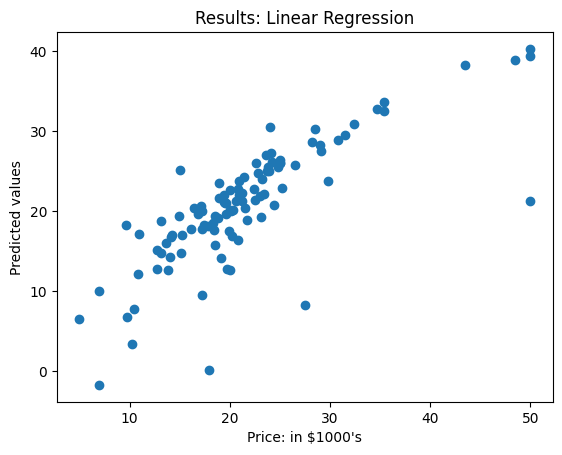

In [35]:
# Plotting Scatter graph to show the results between true values and predicted values
plt.scatter(y_test, y_pred) 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted values") 
plt.title("Results: Linear Regression") 
plt.show() 

<AxesSubplot: xlabel='MEDV'>

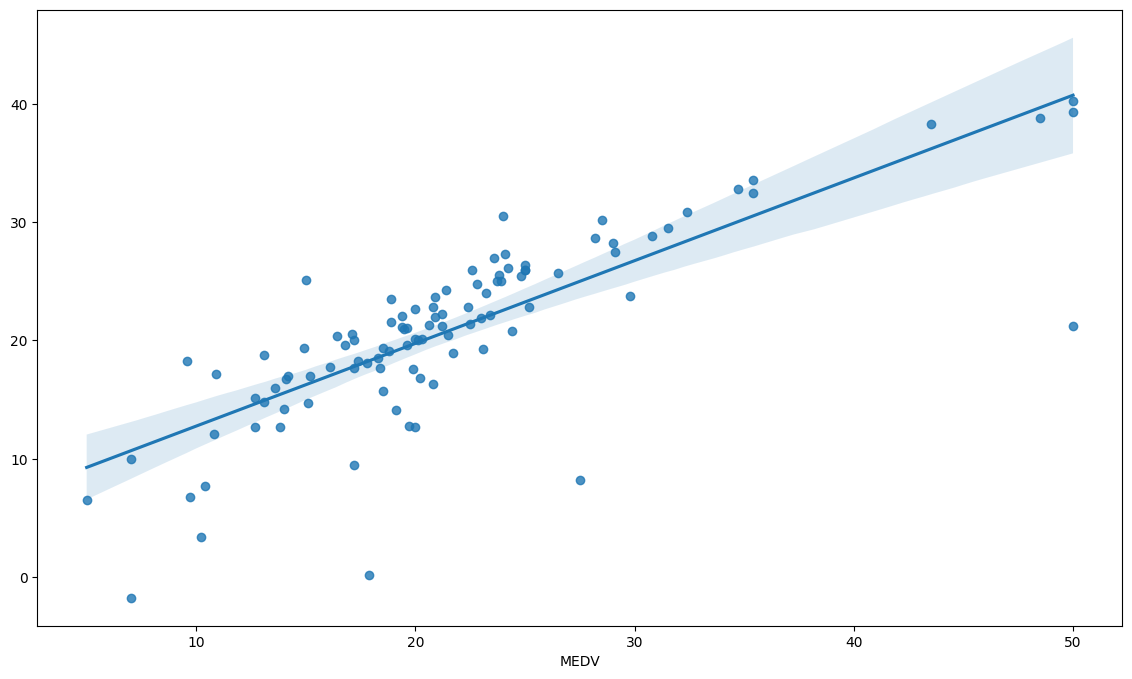

In [36]:
plt.figure(figsize = (14, 8))
sns.regplot(x = y_test, y = y_pred)

**2. Decision Tree**

In [37]:
from sklearn.tree import DecisionTreeRegressor 
Des_Tree = DecisionTreeRegressor(random_state = 0) #create the Des_Tree object
# fit the regressor with X and Y data 
Des_Tree.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=0)

In [38]:
# predict the Des_Tree Model
y_pred = Des_Tree.predict(X_test) 

In [39]:
#Accuracy of model
DesTrain_score=Des_Tree.score(X_train,y_train)*100
DesTest_score=Des_Tree.score(X_test,y_test)*100
print("Training Accuracy : ",DesTrain_score)
print("Testing Accuracy : ",DesTest_score)

Training Accuracy :  100.0
Testing Accuracy :  58.43501431809399


In [40]:
#we use here MAE, MSE & RMSE for model evaluation 
Des_mse = metrics.mean_squared_error(y_test, y_pred) 
Des_rmse=np.sqrt(Des_mse)
Des_mae=metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", Des_mae)
print("Mean Square Error : ",Des_mse) 
print("Root Mean Square Error : ",Des_rmse) 

Mean Absolute Error:  3.625490196078431
Mean Square Error :  30.481176470588235
Root Mean Square Error :  5.520976043290555


In [41]:
 df_model = pd.DataFrame({
    'Test': y_test,
    'Predict': y_pred
    })
print(df_model.head(2))

     Test  Predict
173  23.6     28.1
274  32.4     32.0


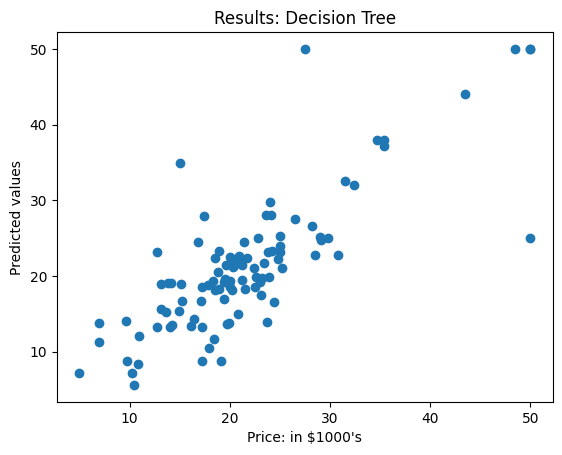

In [42]:
# Plotting Scatter graph to show the results between true values and predicted values
plt.scatter(y_test, y_pred,) 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted values") 
plt.title("Results: Decision Tree") 
plt.show() 


<AxesSubplot: xlabel='MEDV'>

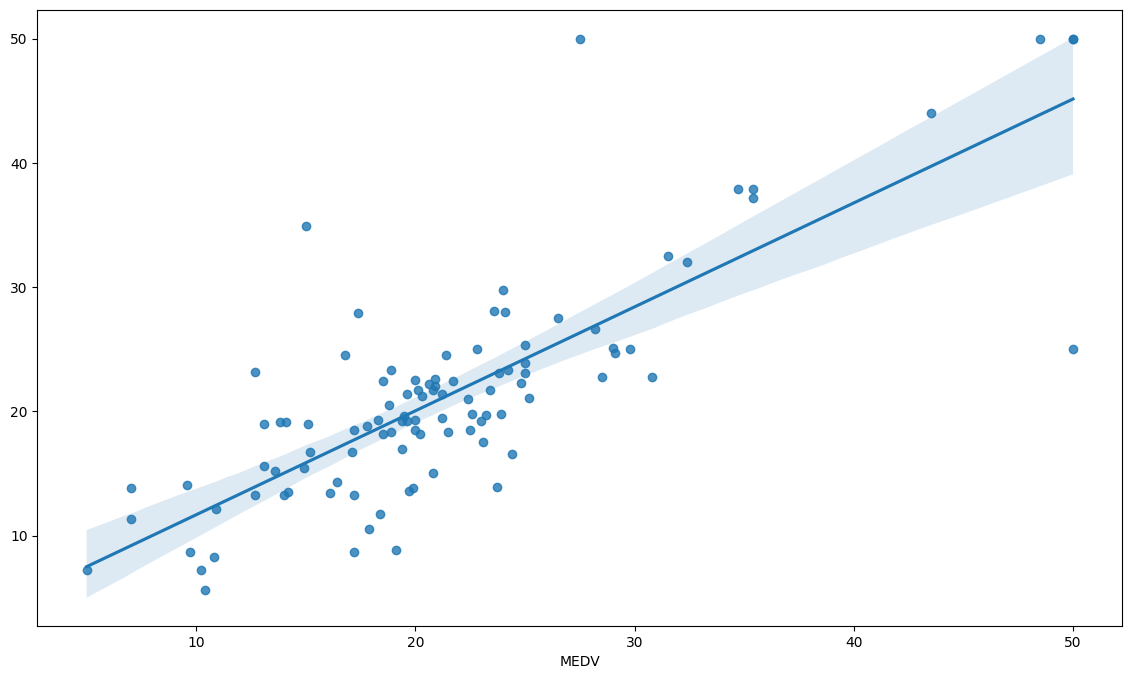

In [43]:
plt.figure(figsize = (14, 8))
sns.regplot(x = y_test, y = y_pred)

**3-GradientBoostingRegressor**

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=500)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=500)

In [45]:
# predict the gbr Model
y_pred = gbr.predict(X_test) 

In [46]:
gbrTrain_score=gbr.score(X_train,y_train)*100
gbrTest_score=gbr.score(X_test,y_test)*100
print("Training Accuracy : ",gbrTrain_score)
print("Testing Accuracy : ",gbrTest_score)

Training Accuracy :  99.51474940675686
Testing Accuracy :  79.7180517045871


<AxesSubplot: xlabel='MEDV'>

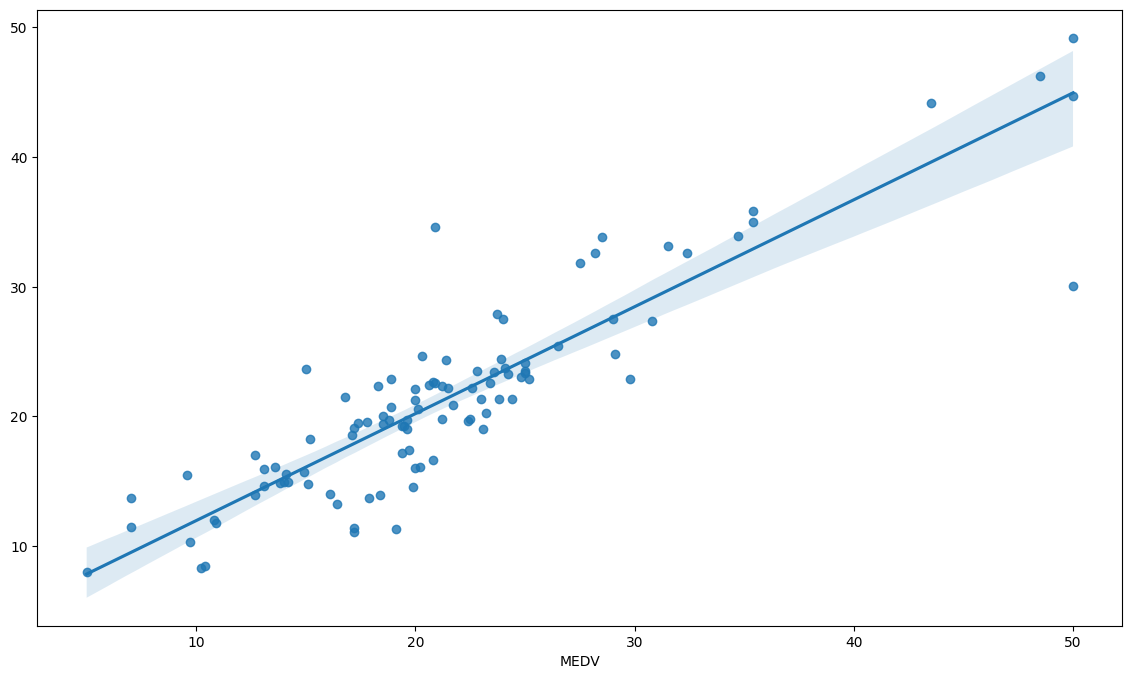

In [47]:
plt.figure(figsize = (14, 8))
sns.regplot(x = y_test, y = y_pred)

In [48]:
 df_model = pd.DataFrame({
    'Test': y_test,
    'Predict': y_pred
    })
print(df_model.head(2))

     Test    Predict
173  23.6  23.404407
274  32.4  32.566746


**4. XGBRegressor**

In [49]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [50]:
y_pred = xgbr.predict(X_test) 

In [51]:
xgbrTrain_score=xgbr.score(X_train,y_train)*100
xgbrTest_score=xgbr.score(X_test,y_test)*100
print("Training Accuracy : ",xgbrTrain_score)
print("Testing Accuracy : ",xgbrTest_score)

Training Accuracy :  99.98440352679047
Testing Accuracy :  79.77047716564908


In [52]:
 df_model = pd.DataFrame({
    'Test': y_test,
    'Predict': y_pred
    })
print(df_model.head(2))

     Test    Predict
173  23.6  24.911655
274  32.4  30.001686


In [53]:
!pip install lazypredict

In [55]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Print results
print(models)

100%|██████████| 42/42 [00:09<00:00,  4.57it/s]

                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
GradientBoostingRegressor                    0.81       0.82    3.64   
BaggingRegressor                             0.80       0.81    3.70   
ExtraTreesRegressor                          0.80       0.81    3.78   
RandomForestRegressor                        0.79       0.80    3.85   
XGBRegressor                                 0.79       0.80    3.86   
LGBMRegressor                                0.78       0.79    3.88   
HistGradientBoostingRegressor                0.78       0.79    3.94   
AdaBoostRegressor                            0.74       0.76    4.24   
KNeighborsRegressor                          0.74       0.75    4.28   
DecisionTreeRegressor                        0.72       0.74    4.38   
SVR                                          0.72       0.73    4.43   
PoissonRegressor                             0.71       0.73    

# From above results we can say that GradientBoostingRegressor,XGBRegressor are more suitable for price prediction between all four models.